In [59]:
# pip install git+https://github.com/LucianoPereiraValenzuela/ECC_2025_testing.git 

In [60]:
import numpy as np 
import matplotlib.pyplot as plt 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeRochesterV2 
from qiskit import transpile

Los computadores cuánticos son muy susceptibles a error debido. Interacciones no deseadas con el ambiente causan __decoherecia__, donde la información codificada en los qubits se fuga hacia el ambiante. Debido a esto, los dispositivos nunca son perfectos y las operaciones cuánticas pueden implementarse con una precision limitada. Para algoritmos cuánticos que requieren miles de puertas cuánticas, esta falta de presicion se acumula probocando que nuestros resultados se alejen de lo esperado. Los __códigos de corrección de errores__ asoman como una alternativa para reducir el impacto de estos errores y escalar computadores cuánticos. Estos se basan en codificar estados cuánticos en qubits lógicos, los cuales son conjuntos de qubits físicos. A través de medidas adecuadas sobre esto qubits lógicos podemos detectar la presencia de un error para posteriormente corregirlo. Esta capa de correción se hará después de cada operación en un circuito. La siguiente figura muestra como sería un circuito cuántico para preparar un estado de Bell de 2 qubit lógicos compuestos de 7 qubits físicos:

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/FT_circuit.JPG?raw=true)

Actualmente, muchas empresas buscan gente con formación en computación cuántica, y en particular en corrección de errores. Acá les dejamos una lista de algunas ofertas de trabajo para gente con conocimiento en corrección de errores.

[Riverlane](https://apply.workable.com/riverlane/j/A3F2E83879/)

[Parityqc](https://parityqc.com/careers)

[Alice and Bob](https://jobs.lever.co/alice-bob/20069b63-d959-4fa5-97b1-1ab735fcb9f7)

[Ionq](https://ionq.com/careers/5184966004)

[Psiquantum](https://www.psiquantum.com/apply?gh_jid=6036325003)

[Rigetti](https://jobs.lever.co/rigetti/81625806-e88c-4985-9158-547536e56a06)

[Quantinuum](https://jobs.eu.lever.co/quantinuum/f8eb483f-7d90-454b-bfdd-77a1f7f3cc71)

[QuEra Computing](https://job-boards.greenhouse.io/queracomputinginc/jobs/4180052008)

En este desafio implementaremos el __código de corrección de errores de 9 qubits__ propuesto por Peter Shor en 1995.

Empezaremos con el código de 3-qubits para mitigar errores de bit-flip. Consideremos el estado de 1 qubit
$$ |\psi\rangle = \alpha |0\rangle + \beta|1\rangle.$$
Decimos que este estado sufrió un error de bit-flip si el estado es negado, es decir,
$$ X|\psi\rangle = \beta |0\rangle + \alpha|1\rangle.$$
Para proteger el estado $|\psi\rangle $ contra este error se realiza la siguiente codificación en 3 qubits,
$$ |\psi'\rangle = \alpha |000\rangle + \beta|111\rangle. $$
Para detectar un bit-flip debemos medir los observables $IZZ$ y $ZZI$, con $Z=|0\rangle\langle0|-|1\rangle\langle1|$. A esto se le conoce como __medidas estabilizadoras__. Los resultado de las medidas estabilizadoras nos permiter detectar errores de bit-flip:

1) $\langle IZZ\rangle=1$ y $\langle IZZ\rangle=1$, no hay error.
1) $\langle IZZ\rangle=1$ y $\langle IZZ\rangle=-1$, el tercer qubit tuvo bit flip.
1) $\langle IZZ\rangle=-1$ y $\langle IZZ\rangle=1$, el primer qubit tuvo bit flip.
1) $\langle IZZ\rangle=-1$ y $\langle IZZ\rangle=-1$, el segundo qubit tuvo bit flip.

Esta medida puede ser implementada sin alterar el estado $|\psi'\rangle$ con 2 qubits auxiliares, uno por cada medida estabilizadora ($clbit_0$ para $IZZ$ y $clbit_1$ para $ZZI$). Posteriormente podemos corregir los errors aplicando puertas $X$ dependiendo del resultado de la medida estabilizadora. A continuación el circuito que implementa este código:

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC25_bit_code.png?raw=true)

__Desafio:__ Complete la siguiente función llamada ``flip_code`` para que implemente el circuito anterior. La función tiene el argumento ``error``, el cual es un circuito para introducir el bit flip. Este debe estar en la posición de la barrera. La corrección debe realizarse a través de la función ``QuantumCircuit.if_test``, la cual permite implementar puerta controladas clasicamente. A continuación un ejemplo:

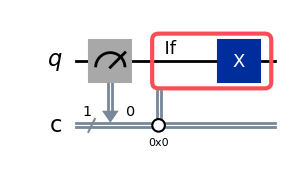

In [61]:
qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr,cr)
qc.measure(qr,cr)

with qc.if_test( (cr,0) ): 
        qc.x(0)

qc.draw('mpl') 

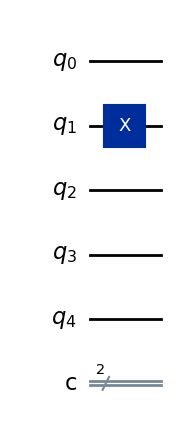

In [62]:
def flip_code( error=None ):

    qr = QuantumRegister(5, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit( qr, cr )

    if error is None:
        error = QuantumCircuit( qr, cr )

    ### Acá va la codificación

    ### 
    qc.compose( error, inplace=True )
    ### Acá va la medida estabilizadora

    ### 

    return qc 

# Esto es un bit flip 
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(2, 'c')
error = QuantumCircuit( qr, cr )
error.x(1)

qc_flip = flip_code(error)
qc_flip.draw('mpl',fold=-1) 

Con un código similar podemos corregir el error de phase flip, el cual se define como un cambio de signo en el estado, 
$$ Z|\psi\rangle =  \alpha |0\rangle - \beta|1\rangle.$$
En este caso, la codificación es 
$$ |\psi''\rangle = \alpha |+++\rangle + \beta|---\rangle,$$
donde $|\pm\rangle=(|0\rangle\pm|1\rangle)/\sqrt{2}$. La medida estabilizadora es $IXX$ y $XXI$, y la corrección se realiza con puertas $Z$ controladas clasicamente, similar al caso anterior:

1) $\langle IXX\rangle=1$ y $\langle XXI\rangle=1$, no hay error.
1) $\langle IXX\rangle=1$ y $\langle XXI\rangle=-1$, el tercer qubit tuvo phase flip.
1) $\langle IXX\rangle=-1$ y $\langle XXI\rangle=1$, el primer qubit tuvo phase flip.
1) $\langle IXX\rangle=-1$ y $\langle XXI\rangle=-1$, el segundo qubit tuvo phase flip.

Esto se implementa con el siguiente circuito:

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC25_phase_code.png?raw=true)

__Desafio:__ Complete la siguiente función llamada ``phase_code`` para que implemente el circuito anterior. De forma analoga, el argumenteo ``error`` es un circuito que introduce un phase plip, y que debe estar en la posición de la barrera. 

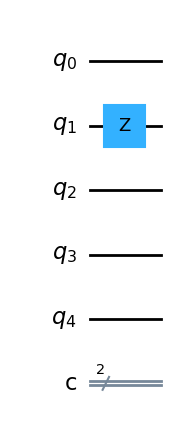

In [63]:
def phase_code( error=None ):

    qr = QuantumRegister(5, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit( qr, cr )

    if error is None:
        error = QuantumCircuit( qr, cr )

    ### Acá va la codificación

    ### 
    qc.compose( error, inplace=True )
    ### Acá va la medida estabilizadora

    ### 

    return qc 

## Esto es un phase flip
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(2, 'c')
error = QuantumCircuit( qr, cr )
error.z(1)

qc_phase = flip_code(error)
qc_phase.draw('mpl', fold=-1) 

El código de Shor combina los código de bit y phase flip en un único circuito. Este estada representado por el siguiente circuito:

![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/ECC25_shor_code.png?raw=true)

La sección en amarillo representa la codificación del estado $|\psi\rangle$ en 9 qubits. Las secciones en rojo representan 3 bloques de código bit flip, mientras que la sección en verde es un código phase flip entre esos bloques. Las secciones en azul son un decoding-encoding, necesario para aplicar el código phase flip sin romper los códigos bit flip. La sección en violeta corresponde a la corrección de los errores. En total 8 qubits auxiliares son utilizados para implementar las medidas estabilizadoras $\{ ZZIIIIIII, IZZIIIIII, IIIZZIIII, IIIIZZIII, IIIIIIZZI, IIIIIIIZZ, XXXXXXIII, IIIXXXXXX\}$. Debido a todo error de 1 qubit puede descomponerse en una combinación de bit flip y phase flip, el código de Shor puede corregir un error arbitrario de 1 qubit.

Notemos que en total se requieren 36 puertas CNOTs. Sin embargo, si combinamos las secciones en azul y verde podemos obtener un circuito equivalente que solo requiere 32 puertas CNOTs.

__Desafio:__ Complete la siguiente función llamada ``shor_code`` para que implemente el circuito anterior, pero optimizado a 32 puertas CNOTs. Incluya solamente la sección del circuito dentro del cuadro negro, es decir, omita la correción. 

OrderedDict()


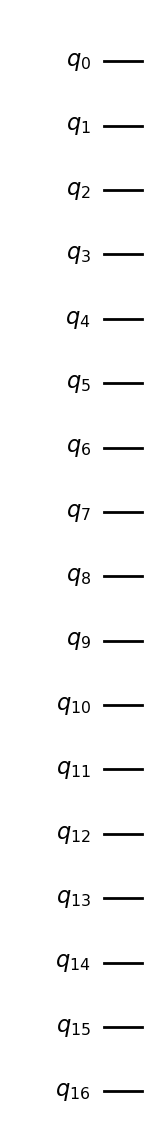

In [64]:
def shor_code( error=None ):

    qr = QuantumRegister(17, 'q')
    qc = QuantumCircuit( qr )

    if error is None:
        error = QuantumCircuit( qr )

    ### Acá va tu circuito
    ### 

    return qc 

qc_shor_code= shor_code()
print( qc_shor_code.count_ops() )
qc_shor_code.draw('mpl', fold=-1) 

Una observación importante es que el código de Shor no es infalible, pues a pesar de que nos protege de errores arbitrarios de 1 qubits, estos solo pueden pasar una vez. Si por ejemplo, el código de Shor no es capaz de detectar 2 bit flips entre qubits en un mismo bloque. Supongamos que $p$ es la probabilidad de que un error ocurra en cada qubit independientemente. Entonces, la probabilidad de que el código de Shor funcione es

$$Pr(\text{no error}) + Pr(\text{1 error}) = (1-p)^9 + 9p(1-p)^8. $$ 

Sin el código, el circuito no es afectado por error con probabilidad $1-p$. De este modo, el código ayuda si

$$ (1-p)^9 + 9p(1-p)^8 > 1-p .$$

Estas dos funciones son graficadas en la siguiente celda.

Text(0.5, 0, '$p$')

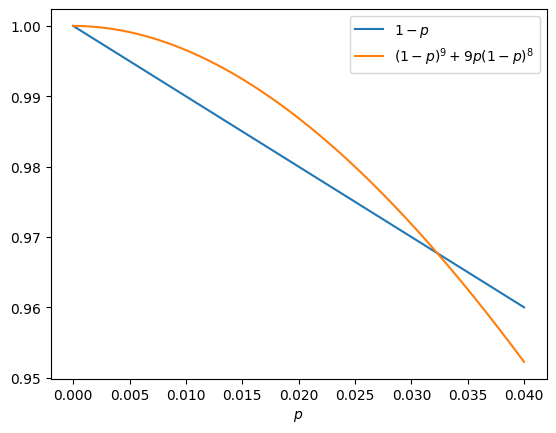

In [65]:
p = np.linspace(0,0.04,1000)
prob_vanilla = 1 - p
prob_shor    = (1-p)**9 +9*p*(1-p)**8
plt.plot( p, prob_vanilla)
plt.plot( p, prob_shor)
plt.legend([r'$1 - p$', r'$(1-p)^9 + 9p(1-p)^8$'])
plt.xlabel(r'$p$')

Podemos ve que hay una region para $p\leq0.30$ donde el código de Shor aumenta la probabilidad de que el circuito se ejecute correctamente. Sin embargo, para probabilidades de error mayor, el código de Shor funciona peor que el circuito sin corrección. Para estar en la región debemos reducir la probabilidad de error, y esto se logra optimizando el diseño y funcionamiento de los dipositivos cuánticos. Actualmente nos encontramos en la transición de la derecha de la intersección a la izquierda, y se espera que en los próximos años tengamos qubit lógicos resistentes a errores arbitrarios. 

Ahora mapearemos el código de Shor a un dispositivo cuántico para ver el qubit lógico. Consideresmos el siguiende dispositivo cuántico de 53 qubits:
![](https://github.com/LucianoPereiraValenzuela/ECC_2025_testing/blob/main/img/53-qubit-rochester-device-ibm-research.jpg?raw=true)

In [66]:
real_backend = FakeRochesterV2()
aer = AerSimulator()
coupling_map = list( real_backend.coupling_map )
basis_gates = [ 'h', 'u', 'cx', 'swap' ]

def count_gates( qc_shor, layout ):
    qc_transpiled = transpile( qc_shor, aer, basis_gates=basis_gates, 
                            coupling_map=real_backend.coupling_map, 
                            optimization_level=0 , seed_transpiler=0,
                            initial_layout=layout )
    print( qc_transpiled.count_ops() )
    # qc_transpiled.draw('mpl', fold=-1)   

Si el circuito mapeado al dispositivo cuántico contiene puertas ``cx`` entre qubits físicamente no conectado, es necesario introducir puertas ``swaps``. Estas permiten intercambiar el estado entre dos qubit, y requieren 3 puertas ``cx`` para ser implementadas. Veamos un ejemplo con el un mapeo trivíal, es decir, los qubit virtuales se mapean al qubit físico en la misma posición:

In [67]:
layout = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
count_gates( qc_shor_code, layout )

OrderedDict()


Si su codigo de Shor esta correcto debería tener del orden de 80 puertas ``swaps``. Encontrar un mapeo óptimo es extremadamente dificil, pues el número de posibles mapeos de $n_{v}$ qubits virtuales a $n_{f}$ qubit físicos es 

$$ N_{var} = \frac{n_{f}!}{(n_{f}-n_{v})!} = \frac{53!}{(53-17)!} =  11491827880220132580495360000.$$

Incluso si nos restringimos a $n_{v}$ qubits físicos, el número sigue siendo grande

$$ N_{var} = \frac{n_{v}!}{(n_{v}-n_{v})!} = 17! =  355687428096000.$$

Por esto, la optimización de circuitos para dispositivos físicos es un problema muy relevante y ampliamente estudiado.

__Desafio:__ Busque un mapeo de qubits virtuales, es decir los qubits de su circuito, a los qubits físicos del dispositivo cuántico anterior que utilize una cantidad de ``swap`` menor a 40. HINT: Intente que los qubits con más puertas ``cx`` esten juntos, y busque una distribución de qubit simétrica, sea horizontal, vertical o diagonal. 

In [68]:
layout = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16] ## Escribe tu respuesta acá 
count_gates( qc_shor_code, layout )

OrderedDict()
